# Airbnb locations

So, I want to go on vacations and I want to book my self-catering property on Airbnb. But I don't know where to go. So I will compare few datasets about different cities on Airbnb.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
ny_airbnb = pd.read_csv('./new-york-city-airbnb-open-data/AB_NYC_2019.csv')
ny_airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [3]:
ba_airbnb = pd.read_csv('Buenos_Aires_AIRBNB.csv')
ba_airbnb.head()

id                                 name  host_id host_name  \
0   7270  ¡¡Great Loft in Palermo Hollywood!!    18822      Toni   
1  11508   Amazing Luxurious Apt-Palermo Soho    42762   Candela   
2  12463  Room in Recoleta - awesome location    48799      Matt   
3  13095   Standard Room at Palermo Viejo B&B    50994     Ariel   
4  13096   Standard Room in Palermo Viejo B&B    50994     Ariel   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0       Palermo -34.58241  -58.43382  Entire home/apt   2033              20   
1       Palermo -34.58225  -58.42460  Entire home/apt   3588               2   
2      Recoleta -34.59761  -58.39468     Private room   1435               1   
3       Palermo -34.59382  -58.42994     Private room   2691               1   
4       Palermo -34.59398  -58.42853     Private room   2691               1   

   number_of_reviews last_review  reviews_per_month  \
0                 14  30-04-2018               0.15   
1                 25  13-08-2019               0.28   
2                 20  11-12-2017               0.17   
3                  1  18-12-2018               0.09   
4                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               1               363  
1                               1               281  
2                               1               365  
3                               7               360  
4                               7               360

In [4]:
si_airbnb = pd.read_csv('./Singapore_AIRBNB.csv')
si_airbnb.head()

id                                 name  host_id  host_name  \
0  49091    COZICOMFORT LONG TERM STAY ROOM 2   266763  Francesca   
1  50646      Pleasant Room along Bukit Timah   227796    Sujatha   
2  56334                          COZICOMFORT   266763  Francesca   
3  71609  Ensuite Room (Room 1 & 2) near EXPO   367042    Belinda   
4  71896      B&B  Room 1 near Airport & EXPO   367042    Belinda   

  neighbourhood_group neighbourhood  latitude  longitude     room_type  price  \
0        North Region     Woodlands   1.44255  103.79580  Private room     83   
1      Central Region   Bukit Timah   1.33235  103.78521  Private room     81   
2        North Region     Woodlands   1.44246  103.79667  Private room     69   
3         East Region      Tampines   1.34541  103.95712  Private room    206   
4         East Region      Tampines   1.34567  103.95963  Private room     94   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0             180                  1  2013-10-21               0.01   
1              90                 18  2014-12-26               0.28   
2               6                 20  2015-10-01               0.20   
3               1                 14  2019-08-11               0.15   
4               1                 22  2019-07-28               0.22   

   calculated_host_listings_count  availability_365  
0                               2               365  
1                               1               365  
2                               2               365  
3                               9               353  
4                               9               355

So, as we can see we have the price for each data sets in the money of the country.   
In order to make sense to these values, we are going to convert the price colum into **Euros**.

We use google to convert prices.

In [5]:
ny_airbnb['price'] /= 1.08 
ba_airbnb['price'] /= 66.69
si_airbnb['price'] /= 1.51

In [6]:
si_airbnb['price'].mean()

112.14105700624204

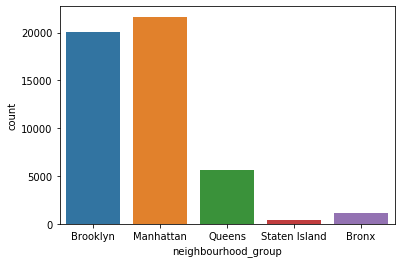

In [7]:
sns.countplot(ny_airbnb["neighbourhood_group"])

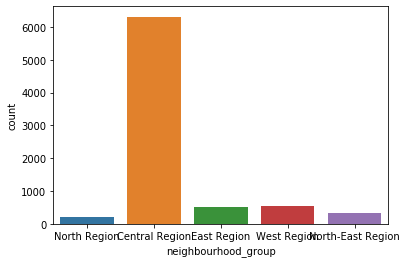

In [8]:
sns.countplot(si_airbnb["neighbourhood_group"])

In [23]:
import folium
from folium.plugins import HeatMap
m=folium.Map([1.44255,103.79580],zoom_start=11)
HeatMap(si_airbnb[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [10]:
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(ny_airbnb[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

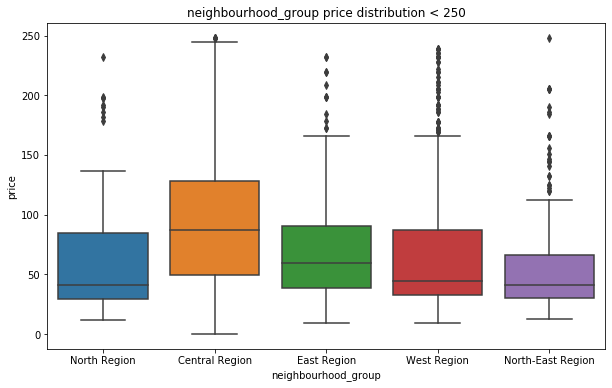

In [11]:
ng = si_airbnb[si_airbnb.price <250]
plt.figure(figsize=(10,6))
sns.boxplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 250")
plt.show()


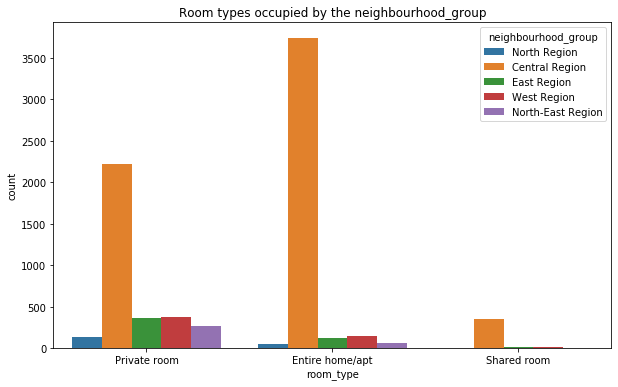

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = si_airbnb)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

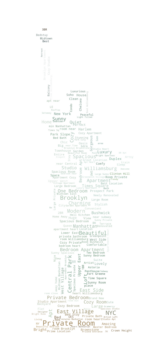

In [85]:
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS
text = " ".join(str(each) for each in ny_airbnb.name)

# Create and generate a word cloud image:
mask=np.array(Image.open("mask_wordcloud.png"))
image_colors = ImageColorGenerator(mask)

stopwords=set(STOPWORDS)

wordcloud = WordCloud(max_words=200,
                      background_color="white",
                      max_font_size=92,
                      mask=mask,
                      contour_color='steelblue', 
                      stopwords=stopwords)
wordcloud.generate(text)
#plt.figure(figsize=(10,6))
#plt.figure(figsize=(15,10))

# Display the generated image:
plt.imshow(wordcloud.recolor(color_func=image_colors), cmap=plt.cm.gray, interpolation='bilinear')
plt.axis("off")
plt.show()

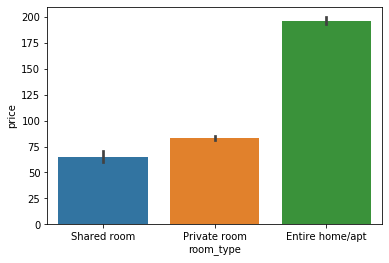

In [56]:
#room_type - price
result = ny_airbnb.groupby(["room_type"])['price'].aggregate(np.median).reset_index().sort_values('price')
sns.barplot(x='room_type', y="price", data=ny_airbnb, order=result['room_type']) #formerly: sns.barplot(x='Id', y="Speed", data=ny_airbnb, palette=colors, order=result['Id'])
plt.show()

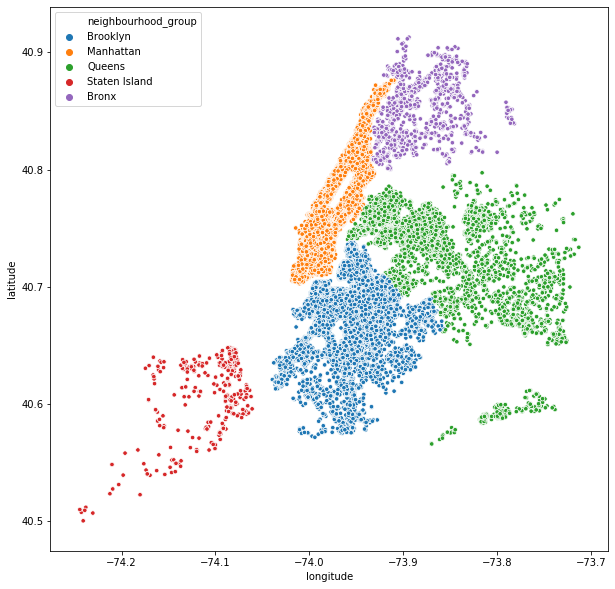

In [25]:
#Review the listings by boroname
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=ny_airbnb)

In [32]:
import plotly.offline as pyo
import plotly.graph_objs as go
roomsi_airbnb = si_airbnb.groupby('room_type').size()/si_airbnb['room_type'].count()*100
labels = roomsi_airbnb.index
values = roomsi_airbnb.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()

In [33]:
roomny_airbnb = ny_airbnb.groupby('room_type').size()/ny_airbnb['room_type'].count()*100
labels = roomny_airbnb.index
values = roomny_airbnb.values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.6)])
fig.show()